In [1]:
# import packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [2]:
# import data
data = pd.read_csv('iris-1.csv')

In [3]:
# view the data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# see what columns are in the dataframe; Species is the main class label
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Do not need the Id column
data.drop('Id', axis=1, inplace=True)

In [6]:
# Check if Id is removed
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Change Iris-setosa to 1 and Not-Iris-setosa to 0
data = data.replace(to_replace = ['Iris-setosa', 'Not-Iris-setosa'], value=[1,0])

In [8]:
# Check if the species was converted from obj to int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
# visualize dataframe
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [10]:
# observe the different values used for species - 2 different values: 0, 1
data['Species'].unique()

array([1, 0])

In [11]:
# check if there are missing values in the dataframe - there are no missing values
data.isnull().sum(axis=0)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# check if there is duplicated data - there is 3
data.duplicated().sum(axis=0)

3

In [13]:
# Remove duplicates
data = data.drop_duplicates()

In [14]:
# check if there is duplicated data - there is 3
data.duplicated().sum(axis=0)

0

In [15]:
# do not include Id as a feature
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
output = ['Species']

In [16]:
# Metion there is outliers for sepalwidthcm (the direction of skewedness)

In [17]:
def graph_features_by_species(feature1, feature2):
    return (ggplot(data, aes(x=feature1, y=feature2, color='Species')) 
     + geom_point()
     + theme_minimal()
    )

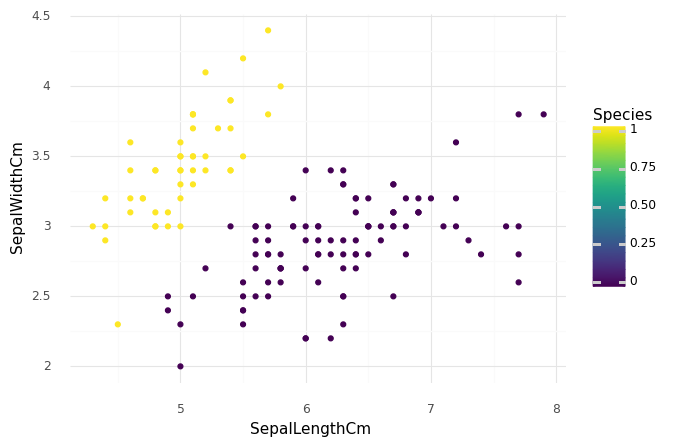

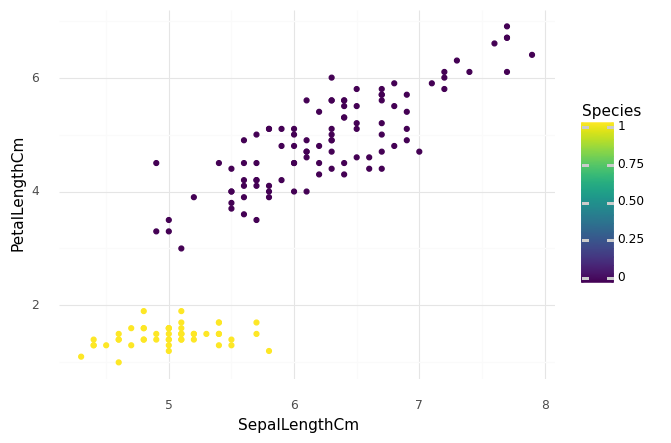

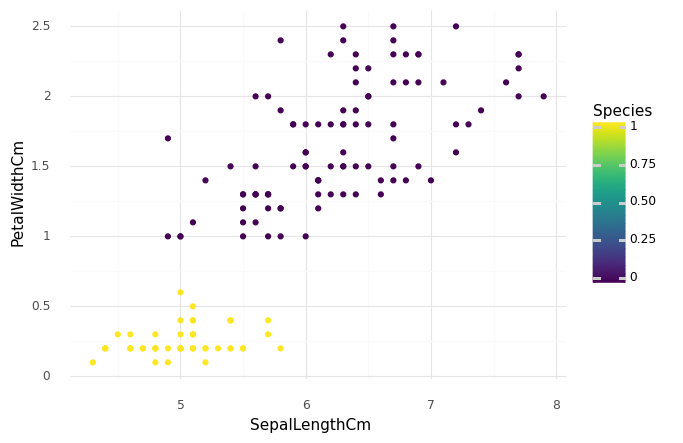

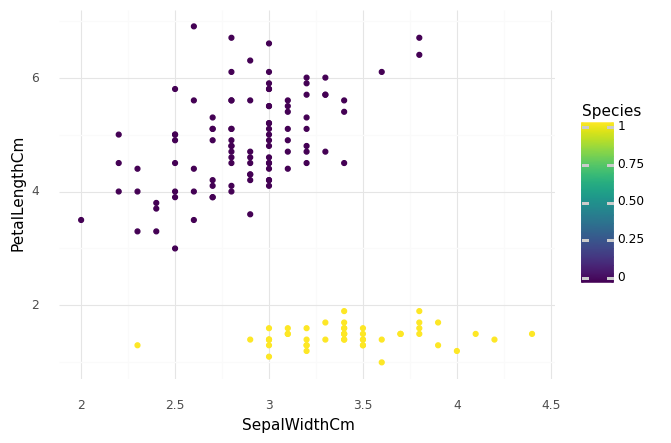

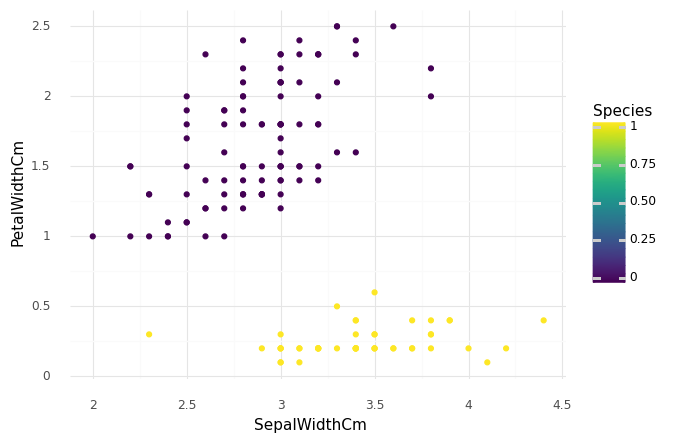

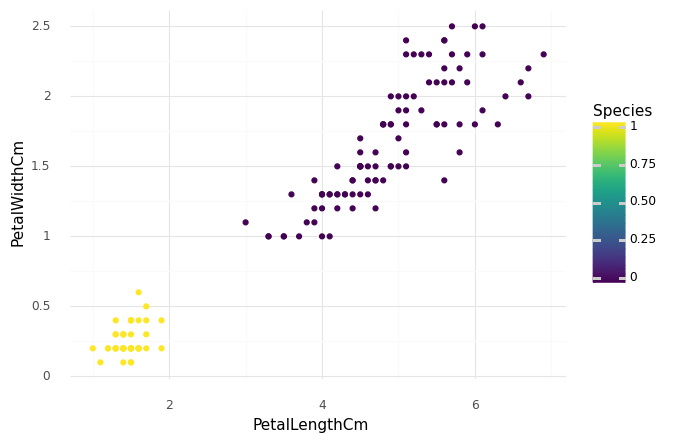

In [18]:
# Create a graph for each feature relation - Note: every feature relation appears to be linearly separable
    
# Graph SepalLengthCm against SepalWidthCm
print(graph_features_by_species('SepalLengthCm', 'SepalWidthCm'))
# Graph SepalLengthCm against PetalLengthCm
print(graph_features_by_species('SepalLengthCm', 'PetalLengthCm'))
# Graph SepalLengthCm against PetalWidthCm
print(graph_features_by_species('SepalLengthCm', 'PetalWidthCm'))
# Graph SepalWidthCm against PetlWidthCm
print(graph_features_by_species('SepalWidthCm', 'PetalLengthCm'))
# Graph SepalWidthCm against PetalLengthCm
print(graph_features_by_species('SepalWidthCm', 'PetalWidthCm'))
# Graph PetalLengthCm against PetalWidthCm
print(graph_features_by_species('PetalLengthCm', 'PetalWidthCm'))

In [19]:
'''
Log transformation scales the data to a predetermined scale (0-1). 
This decreases the scale of the distribution and this is why is very effective in highly skewed data
'''

'\nLog transformation scales the data to a predetermined scale (0-1). \nThis decreases the scale of the distribution and this is why is very effective in highly skewed data\n'

In [20]:
# Split Data in test/train (80/20)
z = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data[features], data[output], test_size=0.3)
print(X_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
29             4.7           3.2            1.6           0.2
60             5.0           2.0            3.5           1.0
136            6.3           3.4            5.6           2.4
32             5.2           4.1            1.5           0.1
86             6.7           3.1            4.7           1.5
..             ...           ...            ...           ...
105            7.6           3.0            6.6           2.1
129            7.2           3.0            5.8           1.6
130            7.4           2.8            6.1           1.9
5              5.4           3.9            1.7           0.4
100            6.3           3.3            6.0           2.5

[102 rows x 4 columns]


In [21]:
# Z-Score the train and test data sets
# for train, transform the data and then fit it to the model
X_train = z.fit_transform(X_train)
# for test, transform the data, but do not fit it to the model to prevent bias/overfitting
X_test = z.transform(X_test)
print(X_train)

[[-1.40102952  0.30542943 -1.30085009 -1.38435488]
 [-1.04846781 -2.36489641 -0.23124997 -0.32466109]
 [ 0.47929957  0.75048373  0.95093963  1.52980305]
 [-0.81342668  2.3081738  -1.35714483 -1.5168166 ]
 [ 0.94938184  0.08290227  0.44428694  0.33764753]
 [-0.57838554  0.75048373 -1.35714483 -1.11943143]
 [-1.51855009  1.19553804 -1.63861854 -1.38435488]
 [-0.46086497  0.97301088 -1.46973431 -1.38435488]
 [ 2.35962866  1.64059234  1.40129757  0.99995615]
 [ 0.71434071 -0.13962488  0.89464488  0.7350327 ]
 [ 1.18442298  0.08290227  0.83835014  1.13241787]
 [ 2.12458752 -1.02973349  1.68277128  1.39734132]
 [-0.46086497 -1.4747878  -0.11866049 -0.32466109]
 [-0.57838554  1.8631195  -1.46973431 -1.11943143]
 [ 0.361779    0.75048373  0.83835014  1.39734132]
 [-1.04846781 -1.69731495 -0.34383946 -0.32466109]
 [-0.69590611  1.41806519 -1.35714483 -1.38435488]
 [ 0.71434071  0.30542943  0.66946591  0.99995615]
 [-1.04846781  0.75048373 -1.30085009 -1.11943143]
 [ 0.361779   -0.36215203  0.21

In [22]:
# Init the SVM Model
SVM_Model = SVC(kernel='linear')

In [23]:
# Train the SVM Model
SVM_Model.fit(X_train, y_train)
# .values will give the values in an array. (shape: (n,1) 
# .ravel will convert that array shape to (n, )
# Source: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

SVC(kernel='linear')

In [24]:
# Testing the SVM Model
y_pred = SVM_Model.predict(X_test)

In [25]:
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

1.0


In [26]:
print("Precision:", precision_score(y_test, y_pred))

Precision: 1.0


In [27]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 1.0


In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  0]
 [ 0 17]]


In [56]:
acc_scores = []
prec_scores = []
conf_matrices = []

X = data[features]
y = data['Species']
n_splits = 10
kf = KFold(n_splits=n_splits)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     X_train = X.iloc[train_index]
#     X_test = X.iloc[test_index]
#     y_train = y[train_index]
#     y_test = y[test_index]
    
    SVM_Model = SVC(kernel='linear')
    SVM_Model.fit(X_train, y_train)
    y_pred = SVM_Model.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, y_pred))
    prec_scores.append(precision_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

avg_acc_score = np.mean(acc_scores)
avg_prec_score = np.mean(prec_scores)
print(acc_scores)
print(f"The average accuracy score is: {avg_acc_score}")
print(f"The average precision score is: {avg_prec_score}")
for cm in conf_matrices:
    print(cm)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
The average accuracy score is: 1.0
The average precision score is: 0.4
[[15]]
[[15]]
[[15]]
[[12  0]
 [ 0  3]]
[[15]]
[[15]]
[[15]]
[[14]]
[[14]]
[[14]]


In [29]:
'''
# Used for univariant analysis - checking every variable for outliers
def histogram_boxplot(feature, figsize=(15,10), bins = None): # Function to automatically generate charts when called
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
'''

'\n# Used for univariant analysis - checking every variable for outliers\ndef histogram_boxplot(feature, figsize=(15,10), bins = None): # Function to automatically generate charts when called\n    """ Boxplot and histogram combined\n    feature: 1-d feature array\n    figsize: size of fig (default (9,8))\n    bins: number of bins (default None / auto)\n    """\n    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2\n                                           sharex = True, # x-axis will be shared among all subplots\n                                           gridspec_kw = {"height_ratios": (.25, .75)}, \n                                           figsize = figsize \n                                           ) # creating the 2 subplots\n    sns.boxplot(feature, ax=ax_box2, showmeans=True, color=\'red\') # boxplot will be created and a star will indicate the mean value of the column\n    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="

In [30]:
# histogram_boxplot(data["SepalLengthCm"]);

In [31]:
# histogram_boxplot(data["SepalWidthCm"]);

In [32]:
# histogram_boxplot(data["PetalLengthCm"]);

In [33]:
# histogram_boxplot(data["PetalWidthCm"]);

In [34]:
# histogram_boxplot(data["Species"]);

In [35]:
# multivariant data analysis
# plt.figure(figsize=(15,13))
# sns.scatterplot(y='Species', x='SepalLengthCm', data=data);

In [36]:
# plt.figure(figsize=(15,13))
# sns.scatterplot(y='SepalLengthCm', x='SepalWidthCm', hue='Species', data=data);
#  TODO: repeat but with other features

In [37]:
# visualizing outlier
# plt.figure(figsize=(20,30))

# numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# for i, variable in enumerate(numeric_columns):
#                      plt.subplot(5,4,i+1)
#                      plt.boxplot(data[variable],whis=1.5)
#                      plt.tight_layout()
#                      plt.title(variable)
# #plt.xlabel(size=12)
# #plt.ylabel(size=12)
# plt.show()

In [38]:
# # Dealing with outlier
# q=data["SepalWidthCm"].quantile(0.99) # Removing 1% of the upper data
# print(q)

In [39]:
# data1=data[data["SepalWidthCm"] < q]

In [40]:
# # visualizing outlier
# plt.figure(figsize=(20,30))

# numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()

# for i, variable in enumerate(numeric_columns):
#                      plt.subplot(5,4,i+1)
#                      plt.boxplot(data1[variable],whis=1.5)
#                      plt.tight_layout()
#                      plt.title(variable)
# #plt.xlabel(size=12)
# #plt.ylabel(size=12)
# plt.show()

In [41]:
# from scipy.stats import norm # Plot the data before trasformation
# all_col = data1.select_dtypes(include=np.number).columns.tolist()
# plt.figure(figsize=(17,75))

# for i in range(len(all_col)):
#     plt.subplot(18,3,i+1)
#     plt.hist(data1[all_col[i]])
#     #sns.displot(df[all_col[i]], kde=True)
#     plt.tight_layout()
#     plt.title(all_col[i],fontsize=25)
    

# plt.show()

In [42]:
# sns.heatmap(data1.corr(), annot=True,cmap='coolwarm');#highlevel view of all numerical variables

In [43]:
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']
#              } 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, y_train)

In [44]:
# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

# grid_predictions = grid.predict(X_test)
  
# # print classification report
# print(classification_report(y_test, grid_predictions))